<span style='color:Blue'> <span style="font-size:25px;"> **[WELL : 9-lTP-1-RJS] Loading-Sorting-Preprocessing-create log plot-export CSV file of a DLIS file**

In [1]:
%%capture

%pip install dlisio                                                   
%pip install qbstyles                                                 
%pip install folium 
%pip install geopandas

from dlisio import dlis
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches                                 

import folium                                                         
from folium import plugins 
import json                                                           

from qbstyles import mpl_style
mpl_style(dark=False)                                                 

from matplotlib_inline.backend_inline import set_matplotlib_formats   
set_matplotlib_formats('svg')                                         

<span style='color:black'> <span style="font-size:30px;"> **WELL : 9-lTP-1-RJS**

<span style='color:brown'> <span style="font-size:19px;"> **STEP 2: load all the required DLIS files**

In [2]:
dlis0, *tail0 = dlis.load('/Users/amirhosseinakhondzadeh/@ DATA/9-lTP-1-RJS/Perfil Convencional/9-itp-1-rjs_12_csng.dlis')
dlis1, *tail1 = dlis.load('/Users/amirhosseinakhondzadeh/@ DATA/9-lTP-1-RJS/Perfil Convencional/9-itp-1-rjs_12_gem.dlis')
dlis2, *tail2 = dlis.load('/Users/amirhosseinakhondzadeh/@ DATA/9-lTP-1-RJS/Perfil Convencional/9-itp-1-rjs_12_mril.dlis')      # NMR
dlis3, *tail3 = dlis.load('/Users/amirhosseinakhondzadeh/@ DATA/9-lTP-1-RJS/Perfil Convencional/9-itp-1-rjs_12_quadstack.dlis')
dlis4, *tail4 = dlis.load('/Users/amirhosseinakhondzadeh/@ DATA/9-lTP-1-RJS/Perfil Convencional/9-itp-1-rjs_16_ict.dlis')       # Cement job
dlis5, *tail5 = dlis.load('/Users/amirhosseinakhondzadeh/@ DATA/9-lTP-1-RJS/Perfil Convencional/9-itp-1-rjs_16_sdl-wstt.dlis')  # density and neutron porosity
dlis6, *tail6 = dlis.load('/Users/amirhosseinakhondzadeh/@ DATA/9-lTP-1-RJS/Perfil Convencional/9-itp-1-rjs_12_cast.dlis')
dlis7, *tail7 = dlis.load('/Users/amirhosseinakhondzadeh/@ DATA/9-lTP-1-RJS/Perfil Convencional/9-itp-1-rjs_12_omri.dlis')

In [3]:
# Define a list of dlis object names (assuming dlis0, dlis1, ..., dlis9 exist)
dlis_names = [f'dlis{i}' for i in range(8)]

# Define depth_units
depth_units = "in"  # Replace "units" with the actual units you want to use

for dlis_name in dlis_names:
    dlis = globals()[dlis_name]  # Get the dlis object using its name
    print("=" * 80)
    print(f"DLIS Object: {dlis_name}")
    print("=" * 80)

    for frame in dlis.frames:
        print(f"Frame Name:         {frame.name}")
        print(f"Number of Channels: {len(frame.channels)}")
        print(f"Depth Interval:     {frame.index_min} - {frame.index_max} {depth_units}")
        print(f"Depth Spacing:      {frame.spacing} {depth_units}")
        print(f"Channel Names:      {', '.join(channel.name for channel in frame.channels)}")
        print("-" * 80)

    print("%" * 80)

DLIS Object: dlis0
Frame Name:         50
Number of Channels: 13
Depth Interval:     None - None in
Depth Spacing:      -0.10000000149011612 in
Channel Names:      TDEP, GRTO, GRKT, URAN, THOR, POTA, TURT, UKRT, TKRT, GRCO, GRTO_UNC, GRTH, GKUT
--------------------------------------------------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
DLIS Object: dlis1
Frame Name:         50
Number of Channels: 24
Depth Interval:     None - None in
Depth Spacing:      -0.10000000149011612 in
Channel Names:      TDEP, CHIS, GOCF, GCFF, OCFF, GRDF, CS, GGCF, FTMP, GRTO, GRKT, CALI, DGD, BS, TENS, DMG, DAL, DSI, DSUL, DK, DCA, DTI, DMN, DFE
--------------------------------------------------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
DLIS Object: dlis2
Frame Name:         50
Number of Channels: 23
Depth Interval:     None - None in
Depth Spacing:      -0.100000001490116

<span style='color:green'> <span style="font-size:19px;"> **STEP 2: create Pandas DataFrames containing all the required Well Log Data**

* DEPTH .m = Measured Depth 


* Lithological Log
 * GR .gAPI = Gamma-Ray **(dlis 2, 3, 4, 5: GR)**


* Resistivity Log
 * AT90, AT60, AT30, AT20, AT10 .ohm.m = Resistivity Log at 10, 20, 30, 60,90 degrees **(dlis 3: AT90, AT60, AT30, AT20, AT10)**
 

* Porosity Logs
 * RHOB .g/cm3 = HRDD Standard Resolution Formation Density  **(dlis 3, 5: RHOB)**
 * NPHI .m3/m3 = Thermal Neutron Porosity (Ratio Method)     **(dlis 3 : NPHI)**


* Sonic Log
 * DTC    .us/ft   = Compressional Wave Sonic Travel Time **(dlis 3, 5: DTC)**
 


 
 
 <div style="text-align: right;">
 
| Lithological Log | Resistivity Log | Porosity Logs |
|:---------------- |:---------------:|--------------:|
| RHGX_HILT        | AT10 .ohm.m     | NPHI    |
| NPHI             | AT20 .ohm.m     |          |
| GR               | AT30 .ohm.m     |          |
|                  | AT30 .ohm.m     |          |
|                  | AT30 .ohm.m     |          |

In [4]:
# Create variable "f" which stands for frame
f2 = dlis2.object('FRAME','50')
f3 = dlis3.object('FRAME','50')
f4 = dlis4.object('FRAME','50')
f5 = dlis5.object('FRAME','50')
f6 = dlis6.object('FRAME','50')

In [5]:
# Create variables "c" which stands for channel
c2 = f2.curves()
c3 = f3.curves()
c4 = f4.curves()
c5 = f5.curves()
c6 = f6.curves()

In [6]:
# Define the channels/logging curves of interest for each frame "f"
# Convert DEPTH values to metres, by multiplying by 0.00254. 
# *0.00254

d2  = {'DEPTH'     : c2['TDEP'],
       'GR'        : c2['GR'],
       'NMRFF'     : c2['MFFIT2']/100,
       'NMREFF'    : c2['MPHIT2']/100,
       'NMRTOT'    : c2['MSIGT2']/100}

d3  = {'DEPTH'   : c3['TDEP'],
       'GR'      : c3['GR'],
       'AT10'    : c3['RT10'],
       'AT20'    : c3['RT20'],
       'AT30'    : c3['RT30'],
       'AT60'    : c3['RT60'],
       'AT90'    : c3['RT90'],
       'RHOZ'    : c3['RHOB'],
       'NPHI'    : c3['NPHI']/100,
       'DTCO'    : c3['DTC'],
       'PEFZ'    : c3['PE']}

d4  = {'DEPTH'   : c4['TDEP'],
       'GR'      : c4['GR']}

d5  = {'DEPTH'   : c5['TDEP'],
       'GR'      : c5['GR'],
       'RHOZ'    : c5['RHOB'],
       'DTCO'    : c5['DTC'],
       'PEFZ'    : c5['PE']}

d6  = {'DEPTH'   : c6['TDEP'],
       'GR'      : c6['GR']}

In [7]:
# Create dataframes containing the required well logging curves 
df2 = pd.DataFrame(d2)
df3 = pd.DataFrame(d3)
df4 = pd.DataFrame(d4)
df5 = pd.DataFrame(d5)
df6 = pd.DataFrame(d6)

In [8]:
# Print the dataframes 
df2, df3, df4, df5, df6

(            DEPTH      GR   NMRFF  NMREFF  NMRTOT
 0     5841.899902 -999.25 -9.9925 -9.9925 -9.9925
 1     5841.799902 -999.25 -9.9925 -9.9925 -9.9925
 2     5841.699902 -999.25 -9.9925 -9.9925 -9.9925
 3     5841.599902 -999.25 -9.9925 -9.9925 -9.9925
 4     5841.499902 -999.25 -9.9925 -9.9925 -9.9925
 ...           ...     ...     ...     ...     ...
 8072  5034.699890 -999.25 -9.9925 -9.9925 -9.9925
 8073  5034.599890 -999.25 -9.9925 -9.9925 -9.9925
 8074  5034.499890 -999.25 -9.9925 -9.9925 -9.9925
 8075  5034.399890 -999.25 -9.9925 -9.9925 -9.9925
 8076  5034.299890 -999.25 -9.9925 -9.9925 -9.9925
 
 [8077 rows x 5 columns],
             DEPTH      GR    AT10    AT20    AT30    AT60    AT90    RHOZ  \
 0     5842.500000 -999.25 -999.25 -999.25 -999.25 -999.25 -999.25 -999.25   
 1     5842.400000 -999.25 -999.25 -999.25 -999.25 -999.25 -999.25 -999.25   
 2     5842.300000 -999.25 -999.25 -999.25 -999.25 -999.25 -999.25 -999.25   
 3     5842.200000 -999.25 -999.25 -999.25 -999.

<span style='color:brown'> <span style="font-size:19px;"> **STEP 3: Data Pre-Processing**

In [9]:
# Remove "-999.250000" from each dataframe. It does not make any sense.
df2.drop(df2.loc[df2['GR']==-999.25].index, inplace=True)
df2.drop(df2.loc[df2['NMRFF']==-9.9925].index, inplace=True) #
df2.drop(df2.loc[df2['NMREFF']==-9.9925].index, inplace=True) #
df2.drop(df2.loc[df2['NMRTOT']==-9.9925].index, inplace=True) #

df3.drop(df3.loc[df3['GR']==-999.25].index, inplace=True)
df3.drop(df3.loc[df3['AT10']==-999.25].index, inplace=True)
df3.drop(df3.loc[df3['AT20']==-999.25].index, inplace=True)
df3.drop(df3.loc[df3['AT30']==-999.25].index, inplace=True)
df3.drop(df3.loc[df3['AT60']==-999.25].index, inplace=True)
df3.drop(df3.loc[df3['AT90']==-999.25].index, inplace=True)
df3.drop(df3.loc[df3['RHOZ']==-999.25].index, inplace=True)
df3.drop(df3.loc[df3['NPHI']==-999.25].index, inplace=True)
df3.drop(df3.loc[df3['DTCO']==-999.25].index, inplace=True)
df3.drop(df3.loc[df3['PEFZ']==-999.25].index, inplace=True)

df4.drop(df4.loc[df4['GR']==-999.25].index, inplace=True)

df5.drop(df5.loc[df5['GR']==-999.25].index, inplace=True)
df5.drop(df5.loc[df5['RHOZ']==-999.25].index, inplace=True)
df5.drop(df5.loc[df5['DTCO']==-999.25].index, inplace=True)
df5.drop(df5.loc[df5['PEFZ']==-999.25].index, inplace=True)

df6.drop(df6.loc[df6['GR']==-999.25].index, inplace=True)

In [10]:
# Reset the Index of each dataframe 
# (drop=True) means that the current Index will be replaced entirely 
df2 = df2.reset_index(drop=True)
df3 = df3.reset_index(drop=True) 
df4 = df4.reset_index(drop=True) 
df5 = df5.reset_index(drop=True)
df6 = df6.reset_index(drop=True)

In [11]:
df2, df3, df4, df5, df6

(            DEPTH         GR     NMRFF    NMREFF    NMRTOT
 0     5822.899902  12.608567  0.060924  0.076719  0.079524
 1     5822.799902  12.652544  0.058488  0.073415  0.074756
 2     5822.699902  12.920747  0.049430  0.066223  0.066772
 3     5822.599902  13.006908  0.040440  0.059378  0.060740
 4     5822.499902  13.076212  0.032618  0.052330  0.055554
 ...           ...        ...       ...       ...       ...
 5921  5230.799893  18.572092  0.149945  0.208676  0.285953
 5922  5230.699893  18.247513  0.155276  0.213644  0.291201
 5923  5230.599893  17.599688  0.165205  0.220657  0.294644
 5924  5230.499893  16.560398  0.177787  0.227845  0.296197
 5925  5230.399893  16.461241  0.175350  0.226293  0.296084
 
 [5926 rows x 5 columns],
             DEPTH         GR        AT10        AT20        AT30        AT60  \
 0     5807.099999  31.437082   38.804691   39.444580   39.701965   38.672817   
 1     5806.999999  31.457056   33.887486   36.151859   35.406181   34.559750   
 2     58

In [12]:
# Invert the order of values, in all the dataframes. By means "iloc indexer" we can select the columns in reverse order
df2  = df2.iloc[::-1]
df3  = df3.iloc[::-1]
df4  = df4.iloc[::-1]
df5  = df5.iloc[::-1]
df6  = df6.iloc[::-1]

In [13]:
# Reset the Index of each dataframe 
df2  = df2.reset_index(drop=True)
df3  = df3.reset_index(drop=True)
df4  = df4.reset_index(drop=True)
df5  = df5.reset_index(drop=True)
df6  = df6.reset_index(drop=True)

In [14]:
# Print the new dataframes 
df2, df3, df4, df5, df6

(            DEPTH         GR     NMRFF    NMREFF    NMRTOT
 0     5230.399893  16.461241  0.175350  0.226293  0.296084
 1     5230.499893  16.560398  0.177787  0.227845  0.296197
 2     5230.599893  17.599688  0.165205  0.220657  0.294644
 3     5230.699893  18.247513  0.155276  0.213644  0.291201
 4     5230.799893  18.572092  0.149945  0.208676  0.285953
 ...           ...        ...       ...       ...       ...
 5921  5822.499902  13.076212  0.032618  0.052330  0.055554
 5922  5822.599902  13.006908  0.040440  0.059378  0.060740
 5923  5822.699902  12.920747  0.049430  0.066223  0.066772
 5924  5822.799902  12.652544  0.058488  0.073415  0.074756
 5925  5822.899902  12.608567  0.060924  0.076719  0.079524
 
 [5926 rows x 5 columns],
             DEPTH         GR        AT10        AT20        AT30        AT60  \
 0     5056.699988   7.992951  589.986755  420.964447  279.087463  193.774918   
 1     5056.799988   7.898713  590.247681  421.280487  279.422455  194.023514   
 2     50

In [15]:
df2.describe(), df3.describe(), df4.describe(), df5.describe(), df6.describe()

(             DEPTH           GR        NMRFF       NMREFF       NMRTOT
 count  5926.000000  5926.000000  5926.000000  5926.000000  5926.000000
 mean   5526.649898    24.872345     0.062325     0.083295     0.088197
 std     171.083320    14.442467     0.033158     0.038003     0.037464
 min    5230.399893     7.052657     0.000000     0.004792     0.006257
 25%    5378.524895    14.999438     0.038061     0.056461     0.060818
 50%    5526.649898    20.138530     0.060907     0.080927     0.084567
 75%    5674.774900    29.200069     0.083708     0.104561     0.108391
 max    5822.899902   100.637749     0.190401     0.373400     0.373526,
              DEPTH           GR         AT10         AT20         AT30  \
 count  7505.000000  7505.000000  7505.000000  7505.000000  7505.000000   
 mean   5431.899994    20.703764   967.085327   929.837524   900.542419   
 std     216.665125    14.154370   745.752747   770.008911   794.561890   
 min    5056.699988     4.155895     0.238730     0

<span style='color:brown'> <span style="font-size:19px;"> **STEP 4: Create dataframe of each well-log data [unique dataframe] to plot them versus depth**

**GR log**

**GR:**
* DLIS 2 ==> 5230.399893 - 5822.899902
* DLIS 3 ==> 5056.699988 - 5807.099999
* DLIS 4 ==> 4407.500085 - 5207.700097  (no)
* DLIS 5 ==> 4407.500085 - 5207.700097
* DLIS 6 ==> 5221.000111 - 5799.575098

In [16]:
# We consider df4 and df8 (only the DEPTH and GR columns)
df5_GR = df5.drop(columns=["RHOZ", "PEFZ", "DTCO"])
df3_GR = df3.drop(columns=["AT10", "AT20", "AT30", "AT60", "AT90", "RHOZ", "NPHI", "DTCO", "PEFZ"])
df2_GR = df2.drop(columns=["NMRFF", "NMREFF", "NMRTOT"])

In [17]:
# We consider df4_GR (only from 5207.799991 m down to 5807.099999 m)
#df5_GR = df5.drop(columns=["RHOB", "PEFZ", "DTCO"])
df5_GR = df5_GR.drop(df5_GR.index[6480:])  # We remove all the rows until index 1217

In [18]:
# We consider df4_GR (only from 5207.799991 m down to 5807.099999 m)
#df3_GR = df3.drop(columns=["RHOB", "PEFZ", "DTCO"])
df3_GR = df3_GR.drop(df3_GR.index[1730:])  # We remove all the rows until index 1217

In [19]:
df5_GR, df3_GR, df2_GR

(            DEPTH         GR
 0     4407.500085  16.601954
 1     4407.600085  16.577482
 2     4407.700085  16.846664
 3     4407.800085  17.710148
 4     4407.900085  17.647223
 ...           ...        ...
 6475  5055.000095  13.287854
 6476  5055.100095  13.616467
 6477  5055.200095  13.752808
 6478  5055.300095  14.431008
 6479  5055.400095  14.070932
 
 [6480 rows x 2 columns],
             DEPTH         GR
 0     5056.699988   7.992951
 1     5056.799988   7.898713
 2     5056.899988   7.962376
 3     5056.999988   8.180799
 4     5057.099988   7.799030
 ...           ...        ...
 1725  5229.199991  19.703590
 1726  5229.299991  19.135807
 1727  5229.399991  18.570379
 1728  5229.499991  18.054426
 1729  5229.599991  17.623287
 
 [1730 rows x 2 columns],
             DEPTH         GR
 0     5230.399893  16.461241
 1     5230.499893  16.560398
 2     5230.599893  17.599688
 3     5230.699893  18.247513
 4     5230.799893  18.572092
 ...           ...        ...
 5921  5822.49

In [20]:
df_GR = pd.concat([df5_GR, df3_GR, df2_GR], axis = 0, ignore_index = True)
df_GR

,DEPTH,GR
0,4407.500085,16.601954
1,4407.600085,16.577482
2,4407.700085,16.846664
3,4407.800085,17.710148
4,4407.900085,17.647223
...,...,...
14131,5822.499902,13.076212
14132,5822.599902,13.006908
14133,5822.699902,12.920747
14134,5822.799902,12.652544


**Resistivity log**

**RT:**
* DLIS 3 ==> 5056.699988 - 5807.099999

In [21]:
df_AT = df3.drop(columns=["GR", "RHOZ", "NPHI", "DTCO", "PEFZ"])
df_AT

,DEPTH,AT10,AT20,AT30,AT60,AT90
0,5056.699988,589.986755,420.964447,279.087463,193.774918,177.749878
1,5056.799988,590.247681,421.280487,279.422455,194.023514,177.940826
2,5056.899988,590.534424,421.627319,279.789917,194.297958,178.154984
3,5056.999988,591.184448,422.412872,280.622070,194.922012,178.650070
4,5057.099988,591.546448,422.849670,281.084869,195.269775,178.929123
...,...,...,...,...,...,...
7500,5806.699999,22.399462,21.680506,19.905346,19.225094,18.764015
7501,5806.799999,27.714745,28.874664,27.260326,26.416059,25.591413
7502,5806.899999,30.556326,32.637108,31.432329,30.652390,29.541357
7503,5806.999999,33.887486,36.151859,35.406181,34.559750,33.457615


**Nuetron Porosity Log**

**NPHI:**
* DLIS 3 ==> 5056.699988 - 5807.099999

In [22]:
df_NPHI = df3.drop(columns=["GR", "AT10", "AT20", "AT30", "AT60", "AT90", "RHOZ", "DTCO", "PEFZ"])
df_NPHI

,DEPTH,NPHI
0,5056.699988,0.007452
1,5056.799988,0.005617
2,5056.899988,0.005345
3,5056.999988,0.004045
4,5057.099988,0.003809
...,...,...
7500,5806.699999,0.028766
7501,5806.799999,0.027969
7502,5806.899999,0.027225
7503,5806.999999,0.026571


**Bulk Density Log**

**RHOZ:**
* 5056.699988 - 5807.099999
* 4407.500085 - 5207.700097

In [23]:
df3_RHOZ = df3.drop(columns=["GR", "AT10", "AT20", "AT30", "AT60", "AT90", "NPHI", "DTCO", "PEFZ"])
df5_RHOZ = df5.drop(columns=["GR", "DTCO", "PEFZ"])

In [24]:
#df3_RHOB = df3.drop(columns=["GR", "AT10", "AT20", "AT30", "AT60", "AT90", "NPHI", "DTCO", "PEFZ"])
df3_RHOZ = df3_RHOZ.drop(df3_RHOZ.index[:1511])

In [25]:
df_RHOZ = pd.concat([df5_RHOZ, df3_RHOZ], axis = 0, ignore_index = True)
df_RHOZ

,DEPTH,RHOZ
0,4407.500085,1.892777
1,4407.600085,1.884005
2,4407.700085,1.865033
3,4407.800085,1.821103
4,4407.900085,1.813886
...,...,...
13992,5806.699999,2.622771
13993,5806.799999,2.640983
13994,5806.899999,2.649009
13995,5806.999999,2.652127


**Compressional Wave Sonic Log**

**DTCO:**
* DLIS 3 ==> 5056.699988 - 5807.099999
* DLIS 5 ==> 4407.500085 - 5207.700097

In [26]:
df3_DTCO = df3.drop(columns=["GR", "AT10", "AT20", "AT30", "AT60", "AT90", "NPHI", "RHOZ", "PEFZ"])
df5_DTCO = df5.drop(columns=["GR", "RHOZ", "PEFZ"])

In [27]:
df3_DTCO = df3_DTCO.drop(df3_DTCO.index[:1511])

In [28]:
df_DTCO = pd.concat([df5_DTCO, df3_DTCO], axis = 0, ignore_index = True)
df_DTCO

,DEPTH,DTCO
0,4407.500085,74.231804
1,4407.600085,74.964722
2,4407.700085,75.295898
3,4407.800085,75.315430
4,4407.900085,74.944778
...,...,...
13992,5806.699999,56.836273
13993,5806.799999,56.609772
13994,5806.899999,56.583157
13995,5806.999999,56.811066


**Photoelectric Factor**

**PEFZ:**
* DLIS 3 ==> 5056.699988 - 5807.099999
* DLIS 5 ==> 4407.500085 - 5207.700097

In [29]:
df3_PEFZ = df3.drop(columns=["GR", "AT10", "AT20", "AT30", "AT60", "AT90", "NPHI", "RHOZ", "DTCO"])
df5_PEFZ = df5.drop(columns=["GR", "RHOZ", "DTCO"])

In [30]:
#df3_PEFZ = df3.drop(columns=["GR", "AT10", "AT20", "AT30", "AT60", "AT90", "NPHI", "RHOB", "DTCO"])
df3_PEFZ = df3_PEFZ.drop(df3_PEFZ.index[:1511])

In [31]:
df_PEFZ = pd.concat([df5_PEFZ, df3_PEFZ], axis = 0, ignore_index = True)
df_PEFZ

,DEPTH,PEFZ
0,4407.500085,9.313059
1,4407.600085,9.620219
2,4407.700085,9.852226
3,4407.800085,10.214882
4,4407.900085,10.206157
...,...,...
13992,5806.699999,5.500680
13993,5806.799999,5.692517
13994,5806.899999,5.749318
13995,5806.999999,5.776120


**NMR (Nuclear MAgnetic Resonance)**

**NMR:**
* DLIS 2 ==> 5217.699893 - 5822.899902

In [32]:
df_NMR = df2.drop(columns=["GR"])
df_NMR

,DEPTH,NMRFF,NMREFF,NMRTOT
0,5230.399893,0.175350,0.226293,0.296084
1,5230.499893,0.177787,0.227845,0.296197
2,5230.599893,0.165205,0.220657,0.294644
3,5230.699893,0.155276,0.213644,0.291201
4,5230.799893,0.149945,0.208676,0.285953
...,...,...,...,...
5921,5822.499902,0.032618,0.052330,0.055554
5922,5822.599902,0.040440,0.059378,0.060740
5923,5822.699902,0.049430,0.066223,0.066772
5924,5822.799902,0.058488,0.073415,0.074756


In [33]:
df_GR, df_AT, df_NPHI, df_RHOZ, df_DTCO, df_PEFZ, df_NMR

(             DEPTH         GR
 0      4407.500085  16.601954
 1      4407.600085  16.577482
 2      4407.700085  16.846664
 3      4407.800085  17.710148
 4      4407.900085  17.647223
 ...            ...        ...
 14131  5822.499902  13.076212
 14132  5822.599902  13.006908
 14133  5822.699902  12.920747
 14134  5822.799902  12.652544
 14135  5822.899902  12.608567
 
 [14136 rows x 2 columns],
             DEPTH        AT10        AT20        AT30        AT60        AT90
 0     5056.699988  589.986755  420.964447  279.087463  193.774918  177.749878
 1     5056.799988  590.247681  421.280487  279.422455  194.023514  177.940826
 2     5056.899988  590.534424  421.627319  279.789917  194.297958  178.154984
 3     5056.999988  591.184448  422.412872  280.622070  194.922012  178.650070
 4     5057.099988  591.546448  422.849670  281.084869  195.269775  178.929123
 ...           ...         ...         ...         ...         ...         ...
 7500  5806.699999   22.399462   21.680506   1

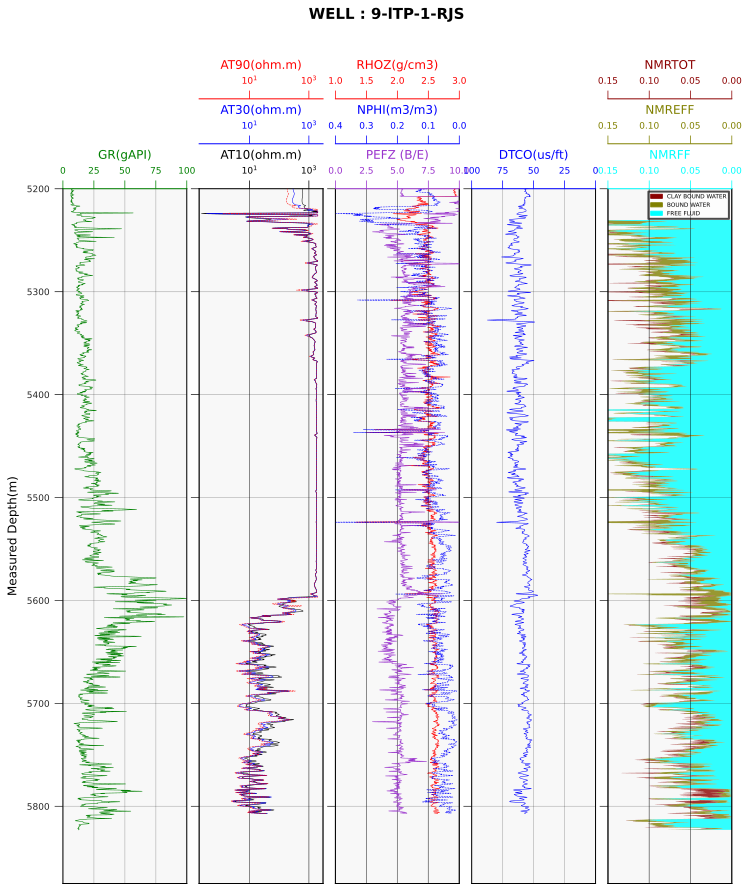

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12,14))
fig.suptitle("WELL : 9-lTP-1-RJS", fontsize=15, fontweight='bold')
fig.subplots_adjust(top=0.8, wspace=0.5)

track_names = ['GR(gAPI)','AT10(ohm.m)','AT30(ohm.m)','AT90(ohm.m)','NPHI(m3/m3)','RHOZ(g/cm3)', 'PEFZ (B/E)','DTCO(us/ft)','NMREFF','NMRFF','NMRTOT']

#Set up the subplots grid
ax1 = plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)    # GR  

ax2 = plt.subplot2grid((1,5),(0,1),rowspan=1,colspan=1)    # AT      
ax3 = ax2.twiny()
ax4 = ax2.twiny()

ax5 = plt.subplot2grid((1,5),(0,2),rowspan=1,colspan=1)    # RHOB
ax6 = ax5.twiny()                                          # NPHI
ax7 = ax5.twiny()                                          # PEFZ

ax8 = plt.subplot2grid((1,5),(0,3),rowspan=1,colspan=1)    # DTCO

ax9 = plt.subplot2grid((1,5),(0,4),rowspan=1,colspan=1)    # NMR
ax10 = ax9.twiny()
ax11 = ax9.twiny()


####################################################################
# First Track: GR
"""
from scipy.interpolate import interp1d  # Import the interpolate function
interpolated_GR = interp1d(df_GR['DEPTH'], df_GR['GR'], kind='cubic')
depth_GR = np.linspace(df_GR['DEPTH'].min(), df_GR['DEPTH'].max(), 300)
ax1.plot(interpolated_GR(depth_GR), depth_GR, color="green", lw=0.5)  # Use interpolated data
"""
ax1.plot("GR","DEPTH", data = df_GR, color = "green", lw = 0.5)            # To call the data from the df dataframe 
ax1.set_xlim(0,100)                                                      
ax1.spines['top'].set_position(('outward',0)) 
ax1.set_xlabel('GR(gAPI)',color='green')  
ax1.set_ylabel('Measured Depth(m)',color='black') 
ax1.tick_params(axis='x', colors='green')
ax1.spines["top"].set_edgecolor("green")

# Second Track: RT90, RT30, AT10
ax2.plot("AT10","DEPTH", data= df_AT, color="black", lw = 0.5)
ax2.set_xlim(0.2,3000)                                                   # [0.2-2000] is the typical rang
ax2.semilogx()                                                           # x in a log scale
ax2.spines['top'].set_position(('outward',0))
ax2.set_xlabel('AT10(ohm.m)', color='black') 
ax2.tick_params(axis='x', colors='black')
ax2.spines["top"].set_edgecolor("black")

ax3.plot("AT30","DEPTH", data= df_AT, color="blue", lw = 0.5)
ax3.set_xlim(0.2,3000)                                                   # [0.2-2000] is the typical rang
ax3.semilogx()                                                           # x in a log scale
ax3.spines['top'].set_position(('outward',45))
ax3.set_xlabel('AT30(ohm.m)', color='blue') 
ax3.tick_params(axis='x', colors='blue')
ax3.spines["top"].set_edgecolor("blue")

ax4.plot("AT90","DEPTH", data= df_AT, color="red", lw = 0.5, linestyle = '--')
ax4.set_xlim(0.2,3000)                                                    
ax4.semilogx()                                                            
ax4.spines['top'].set_position(('outward',90))
ax4.set_xlabel('AT90(ohm.m)', color='red') 
ax4.tick_params(axis='x', colors='red')
ax4.spines["top"].set_edgecolor("red")


# Third Track: RHOZ, NPHI

ax5.plot("RHOZ","DEPTH", data= df_RHOZ, color="red", lw = 0.5)
ax5.set_xlim(1,3)
ax5.spines['top'].set_position(('outward',90))
ax5.set_xlabel('RHOZ(g/cm3)', color='red') 
ax5.tick_params(axis='x', colors='red')
ax5.spines["top"].set_edgecolor("red")


ax6.plot("NPHI","DEPTH", data= df_NPHI, color="blue", lw = 0.5, linestyle = '--')
ax6.set_xlim(0.4,0)                                                         
ax6.spines['top'].set_position(('outward',45))
ax6.set_xlabel('NPHI(m3/m3)', color='blue') 
ax6.tick_params(axis='x', colors='blue')
ax6.spines["top"].set_edgecolor("blue")


# Forth Track: PEFZ
ax7.plot("PEFZ","DEPTH", data= df_PEFZ, color="darkorchid", lw = 0.5)
ax7.set_xlim(0,10)                                                      
ax7.spines['top'].set_position(('outward',0))
ax7.set_xlabel('PEFZ (B/E)', color='darkorchid') 
ax7.tick_params(axis='x', colors='darkorchid')
ax7.spines["top"].set_edgecolor("darkorchid")


# Fifth Track: DTCO
ax8.plot("DTCO","DEPTH", data= df_DTCO, color="blue", lw = 0.5)
ax8.set_xlim(100,0)                                                      
ax8.spines['top'].set_position(('outward',0))
ax8.set_xlabel('DTCO(us/ft)', color='blue') 
ax8.tick_params(axis='x', colors='blue')
ax8.spines["top"].set_edgecolor("blue")



# Sixth Track: NMR
ax9.plot("NMRTOT","DEPTH", data= df_NMR, color="darkred", lw = 0)
ax9.set_xlim(0.15,0)                                                   # [0.2-2000] is the typical rang   
ax9.spines['top'].set_position(('outward',90))
ax9.set_xlabel('NMRTOT', color='darkred') 
ax9.tick_params(axis='x', colors='darkred')
ax9.spines["top"].set_edgecolor("darkred")

ax10.plot("NMREFF","DEPTH", data= df_NMR, color="olive", lw = 0)
ax10.set_xlim(0.15,0)                                                   # [0.2-2000] is the typical rang     
ax10.spines['top'].set_position(('outward',45))
ax10.set_xlabel('NMREFF', color='olive') 
ax10.tick_params(axis='x', colors='olive')
ax10.spines["top"].set_edgecolor("olive")

ax11.plot("NMRFF","DEPTH", data= df_NMR, color="aqua", lw = 0)
ax11.set_xlim(0.15,0)                                                   # [0.2-2000] is the typical rang
ax11.spines['top'].set_position(('outward',0))
ax11.set_xlabel('NMRFF', color='aqua') 
ax11.tick_params(axis='x', colors='aqua')
ax11.spines["top"].set_edgecolor("aqua")

#======
import matplotlib.patches as mpatches

# Fill the areas with shading using RGB values and modified alpha values
ax9.fill_betweenx(df_NMR["DEPTH"], df_NMR["NMRFF"], 0, facecolor=(0, 1, 1), alpha=0.8, interpolate=True)  # Aqua
ax9.fill_betweenx(df_NMR["DEPTH"], df_NMR["NMREFF"], df_NMR["NMRFF"], facecolor=(128/255, 128/255, 0), alpha=0.8, interpolate=True)  # Olive
ax9.fill_betweenx(df_NMR["DEPTH"], df_NMR["NMRTOT"], df_NMR["NMREFF"], facecolor=(139/255, 0, 0), alpha=0.8, interpolate=True)  # Dark Red

# Create a legend for the fifth track
Clay_Bound_Water = mpatches.Patch(color=(139/255, 0, 0), label='CLAY BOUND WATER')
Bound_Water = mpatches.Patch(color=(128/255, 128/255, 0), label='BOUND WATER')
Free_Fluid = mpatches.Patch(color=(0, 1, 1), label='FREE FLUID')

legend = ax9.legend(handles=[Clay_Bound_Water, Bound_Water, Free_Fluid], loc='upper right', fontsize='xx-small', framealpha=0.7)

# Set the border properties of the legend
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('black')

###############################################################################################################################################################################

for i, ax in enumerate(fig.axes):
 
    ax.set_ylim(5875,5200)  # Set the depth range
                                          # Depth interval for the prediction
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    

# Add a black border to each subplot 
for ax in [ax1, ax2, ax5, ax8, ax9]:
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')

# Hide tick labels on the y-axis
for ax in [ax2, ax5, ax8, ax9]:
    plt.setp(ax.get_yticklabels(), visible=False)

    
# Reduce the space between each subplot
fig.subplots_adjust(wspace = 0.1)


###############################################################################################################################################################################
# Save plot

save_path = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Plots - data evaluation for selection/Well-log Plot (9-lTP-1-RJS).png'

# Save the plot to the specified path
plt.savefig(save_path, dpi=300, bbox_inches="tight")

# Show the plot (optional)
plt.show()

# ================

In [35]:
#=====
df5_GR = df5.drop(columns=["RHOZ", "PEFZ", "DTCO"])
df3_GR = df3.drop(columns=["AT10", "AT20", "AT30", "AT60", "AT90", "RHOZ", "NPHI", "DTCO", "PEFZ"])
df2_GR = df2.drop(columns=["NMRFF", "NMREFF", "NMRTOT"])
df5_GR = df5_GR.drop(df5_GR.index[6480:])
df3_GR = df3_GR.drop(df3_GR.index[1730:])
df_GR = pd.concat([df5_GR, df3_GR, df2_GR], axis = 0, ignore_index = True)

df_AT = df3.drop(columns=["GR", "RHOZ", "NPHI", "DTCO", "PEFZ"])

df3_RHOZ = df3.drop(columns=["GR", "AT10", "AT20", "AT30", "AT60", "AT90", "NPHI", "DTCO", "PEFZ"])
df5_RHOZ = df5.drop(columns=["GR", "DTCO", "PEFZ"])

df3_RHOZ = df3_RHOZ.drop(df3_RHOZ.index[:1511])
df_RHOZ = pd.concat([df5_RHOZ, df3_RHOZ], axis = 0, ignore_index = True)

df_NPHI = df3.drop(columns=["GR", "AT10", "AT20", "AT30", "AT60", "AT90", "RHOZ", "DTCO", "PEFZ"])

df3_DTCO = df3.drop(columns=["GR", "AT10", "AT20", "AT30", "AT60", "AT90", "NPHI", "RHOZ", "PEFZ"])
df5_DTCO = df5.drop(columns=["GR", "RHOZ", "PEFZ"])
df3_DTCO = df3_DTCO.drop(df3_DTCO.index[:1511])
df_DTCO = pd.concat([df5_DTCO, df3_DTCO], axis = 0, ignore_index = True)

df3_PEFZ = df3.drop(columns=["GR", "AT10", "AT20", "AT30", "AT60", "AT90", "NPHI", "RHOZ", "DTCO"])
df5_PEFZ = df5.drop(columns=["GR", "RHOZ", "DTCO"])
df3_PEFZ = df3_PEFZ.drop(df3_PEFZ.index[:1511])
df_PEFZ = pd.concat([df5_PEFZ, df3_PEFZ], axis = 0, ignore_index = True)

df_NMR = df2.drop(columns=["GR"])

<span style='color:brown'> <span style="font-size:19px;"> **STEP 5: create an unique DataFrame containing all the Well Log Data required for the ML prediction**

# 5230 - 5800

In [36]:

#======
df_GR = df_GR[(df_GR.index >= 8215) & (df_GR.index <= 13910)]
df_AT = df_AT[(df_AT.index >= 1740) & (df_AT.index <= 7440)]
df_RHOZ = df_RHOZ[(df_RHOZ.index >= 8230) & (df_RHOZ.index <= 13935)]
df_NPHI = df_NPHI[(df_NPHI.index >= 1740) & (df_NPHI.index <= 7440)]
df_DTCO = df_DTCO[(df_DTCO.index >= 8230) & (df_DTCO.index <= 13935)]
df_PEFZ = df_PEFZ[(df_PEFZ.index >= 8230) & (df_PEFZ.index <= 13935)]
df_NMR = df_NMR[(df_NMR.index >= 1) & (df_NMR.index <= 5698)]

#df_GR, df_AT, df_RHOZ, df_NPHI, df_DTCO, df_PEFZ, df_NMR

# 5230 - 5590 (RESERVOIR)

In [37]:
#=====
df5_GR = df5.drop(columns=["RHOZ", "PEFZ", "DTCO"])
df3_GR = df3.drop(columns=["AT10", "AT20", "AT30", "AT60", "AT90", "RHOZ", "NPHI", "DTCO", "PEFZ"])
df2_GR = df2.drop(columns=["NMRFF", "NMREFF", "NMRTOT"])
df5_GR = df5_GR.drop(df5_GR.index[6480:])
df3_GR = df3_GR.drop(df3_GR.index[1730:])
df_GR = pd.concat([df5_GR, df3_GR, df2_GR], axis = 0, ignore_index = True)

df_AT = df3.drop(columns=["GR", "RHOZ", "NPHI", "DTCO", "PEFZ"])

df3_RHOZ = df3.drop(columns=["GR", "AT10", "AT20", "AT30", "AT60", "AT90", "NPHI", "DTCO", "PEFZ"])
df5_RHOZ = df5.drop(columns=["GR", "DTCO", "PEFZ"])

df3_RHOZ = df3_RHOZ.drop(df3_RHOZ.index[:1511])
df_RHOZ = pd.concat([df5_RHOZ, df3_RHOZ], axis = 0, ignore_index = True)

df_NPHI = df3.drop(columns=["GR", "AT10", "AT20", "AT30", "AT60", "AT90", "RHOZ", "DTCO", "PEFZ"])

df3_DTCO = df3.drop(columns=["GR", "AT10", "AT20", "AT30", "AT60", "AT90", "NPHI", "RHOZ", "PEFZ"])
df5_DTCO = df5.drop(columns=["GR", "RHOZ", "PEFZ"])
df3_DTCO = df3_DTCO.drop(df3_DTCO.index[:1511])
df_DTCO = pd.concat([df5_DTCO, df3_DTCO], axis = 0, ignore_index = True)

df3_PEFZ = df3.drop(columns=["GR", "AT10", "AT20", "AT30", "AT60", "AT90", "NPHI", "RHOZ", "DTCO"])
df5_PEFZ = df5.drop(columns=["GR", "RHOZ", "DTCO"])
df3_PEFZ = df3_PEFZ.drop(df3_PEFZ.index[:1511])
df_PEFZ = pd.concat([df5_PEFZ, df3_PEFZ], axis = 0, ignore_index = True)

df_NMR = df2.drop(columns=["GR"])
#======
df_GR = df_GR[(df_GR.index >= 8215) & (df_GR.index <= 11810)]
df_AT = df_AT[(df_AT.index >= 1740) & (df_AT.index <= 5340)]
df_RHOZ = df_RHOZ[(df_RHOZ.index >= 8230) & (df_RHOZ.index <= 11830)]
df_NPHI = df_NPHI[(df_NPHI.index >= 1740) & (df_NPHI.index <= 5340)]
df_DTCO = df_DTCO[(df_DTCO.index >= 8230) & (df_DTCO.index <= 11830)]
df_PEFZ = df_PEFZ[(df_PEFZ.index >= 8230) & (df_PEFZ.index <= 11830)]
df_NMR = df_NMR[(df_NMR.index >= 1) & (df_NMR.index <= 3600)]

df_GR, df_AT, df_RHOZ, df_NPHI, df_DTCO, df_PEFZ, df_NMR

(             DEPTH         GR
 8215   5230.899893  18.364668
 8216   5230.999893  18.145609
 8217   5231.099893  17.943176
 8218   5231.199893  18.042002
 8219   5231.299893  18.240273
 ...            ...        ...
 11806  5589.999899  60.493317
 11807  5590.099899  62.248062
 11808  5590.199899  64.159599
 11809  5590.299899  67.805580
 11810  5590.399899  69.943192
 
 [3596 rows x 2 columns],
             DEPTH         AT10         AT20         AT30         AT60  \
 1740  5230.699991    24.645149    32.113060    36.530033    38.342896   
 1741  5230.799991    19.923513    23.077419    24.418062    24.978024   
 1742  5230.899991    19.196234    20.223829    20.528210    20.811172   
 1743  5230.999991    17.247047    17.986269    17.625771    17.743549   
 1744  5231.099991    15.329754    15.317550    15.300582    15.332671   
 ...           ...          ...          ...          ...          ...   
 5336  5590.299996  1779.227783  1784.408813  1788.753174  1792.570801   
 5337  5

In [38]:
import pandas as pd

# Create a list of DataFrames to merge
dataframes_to_merge = [df_AT[['DEPTH', 'AT10', 'AT30', 'AT90']],
                       df_RHOZ[['DEPTH', 'RHOZ']],
                       df_NPHI[['DEPTH', 'NPHI']],
                       df_DTCO[['DEPTH', 'DTCO']],
                       df_PEFZ[['DEPTH', 'PEFZ']],
                       df_NMR[['DEPTH', 'NMRFF', 'NMREFF', 'NMRTOT']]]

# Initialize the merged DataFrame with df_GR
df_9_ITP_ML = df_GR

# Loop through the list of DataFrames and merge them with df_944_ML
for df in dataframes_to_merge:
    df_9_ITP_ML = pd.merge_asof(df_9_ITP_ML, df, on='DEPTH', direction='nearest')

# Reset the index if needed
# df_9_ITP_ML.reset_index(drop=True, inplace=True)

# Display the merged DataFrame
df_9_ITP_ML

,DEPTH,GR,AT10,AT30,AT90,RHOZ,NPHI,DTCO,PEFZ,NMRFF,NMREFF,NMRTOT
0,5230.899893,18.364668,19.196234,20.528210,22.001585,2.112285,0.277651,68.337448,8.430419,0.146941,0.206191,0.279142
1,5230.999893,18.145609,17.247047,17.625771,18.691048,2.125317,0.281514,67.993439,8.418438,0.142935,0.207419,0.269785
2,5231.099893,17.943176,15.329754,15.300582,16.073359,2.130714,0.297487,67.663246,8.383753,0.137963,0.210700,0.263316
3,5231.199893,18.042002,11.579553,11.556740,11.997000,2.124417,0.312481,67.298561,8.239479,0.131576,0.215271,0.257083
4,5231.299893,18.240273,10.135851,10.116982,10.471834,2.124772,0.306717,66.678116,8.161089,0.124349,0.220581,0.251031
...,...,...,...,...,...,...,...,...,...,...,...,...
3591,5589.999899,60.493317,1778.057129,1787.317871,1793.273804,2.549341,0.114878,53.896229,6.085524,0.021548,0.044737,0.047193
3592,5590.099899,62.248062,1779.707397,1789.183716,1795.288086,2.535191,0.112063,53.616760,6.189338,0.021446,0.042745,0.043601
3593,5590.199899,64.159599,1779.757446,1789.283081,1795.457642,2.500213,0.107529,53.366962,6.364588,0.020265,0.041515,0.041670
3594,5590.299899,67.805580,1779.227783,1788.753174,1794.995483,2.460282,0.106075,53.032112,6.533904,0.017628,0.041529,0.041578


In [39]:
df_9_ITP_ML = df_9_ITP_ML.dropna()
df_9_ITP_ML

,DEPTH,GR,AT10,AT30,AT90,RHOZ,NPHI,DTCO,PEFZ,NMRFF,NMREFF,NMRTOT
0,5230.899893,18.364668,19.196234,20.528210,22.001585,2.112285,0.277651,68.337448,8.430419,0.146941,0.206191,0.279142
1,5230.999893,18.145609,17.247047,17.625771,18.691048,2.125317,0.281514,67.993439,8.418438,0.142935,0.207419,0.269785
2,5231.099893,17.943176,15.329754,15.300582,16.073359,2.130714,0.297487,67.663246,8.383753,0.137963,0.210700,0.263316
3,5231.199893,18.042002,11.579553,11.556740,11.997000,2.124417,0.312481,67.298561,8.239479,0.131576,0.215271,0.257083
4,5231.299893,18.240273,10.135851,10.116982,10.471834,2.124772,0.306717,66.678116,8.161089,0.124349,0.220581,0.251031
...,...,...,...,...,...,...,...,...,...,...,...,...
3591,5589.999899,60.493317,1778.057129,1787.317871,1793.273804,2.549341,0.114878,53.896229,6.085524,0.021548,0.044737,0.047193
3592,5590.099899,62.248062,1779.707397,1789.183716,1795.288086,2.535191,0.112063,53.616760,6.189338,0.021446,0.042745,0.043601
3593,5590.199899,64.159599,1779.757446,1789.283081,1795.457642,2.500213,0.107529,53.366962,6.364588,0.020265,0.041515,0.041670
3594,5590.299899,67.805580,1779.227783,1788.753174,1794.995483,2.460282,0.106075,53.032112,6.533904,0.017628,0.041529,0.041578


Convert the DataFrame into a CSV file (CSV file is required for ML Algorithms implementation)

In [40]:
destination_file_path = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Output of well data, [unique dataframe creation]/df_9_ITP_ML.csv'

df_9_ITP_ML.to_csv(destination_file_path, index=None)

print(f"DataFrame saved as CSV file at: {destination_file_path}")

DataFrame saved as CSV file at: /Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Output of well data, [unique dataframe creation]/df_9_ITP_ML.csv
